In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
def bspline(x, k, i):
    if k == 0:
        if i <= x < (i + 1):
            return 1
        else:
            return 0
    else:
        return bspline(x, k-1, i) * (x - i)/float(k) + bspline(x, k-1, i+1) * (i + k + 1 - x)/float(k)

In [4]:
X = []
Y = []

for x_idx in range(-2000,2000 + 1):
    x = x_idx/1000
    y = bspline(x, 3, -2)
    
    X.append(x)
    Y.append(y)

In [5]:
cubic_spline_df = pd.DataFrame(dict(x = X, y = Y))

In [6]:
section_1 = cubic_spline_df.query('-2 <= x <= -1')
section_2 = cubic_spline_df.query('-1 <= x <=  0')
section_3 = cubic_spline_df.query(' 0 <= x <=  1')
section_4 = cubic_spline_df.query(' 1 <= x <=  2')

In [7]:
mod1 = smf.ols('y ~ x + I(x**2) + I(x**3)', data = section_4)
res = mod1.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.077e+29
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:07:10   Log-Likelihood:                 32711.
No. Observations:                1001   AIC:                        -6.541e+04
Df Residuals:                     997   BIC:                        -6.539e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3333   8.31e-15    1.6e+14      0.000       1.333       1.333
x             -2.0000   1.73e-14  -1.16e+14      0.000      -2.000      -2.000
I(x ** 2)      1.0000   1.17e-14   8.54e+13      0.000       1.000       1.000
I(x ** 3)     -0.1667    2.6e-15  -6.42e+13      0.000      -0.167      -0.167
==============================================================================
Omnibus:                      219.967   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.969
Skew:                           1.394   Prob(JB):                     6.91e-84
Kurtosis:                       4.189   Cond. No.                     2.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
mod2 = smf.ols('y ~ I(x**2) + I(x**3)', data = section_3)
res = mod2.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.297e+32
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:07:10   Log-Likelihood:                 34597.
No. Observations:                1001   AIC:                        -6.919e+04
Df Residuals:                     998   BIC:                        -6.917e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6667   1.49e-17   4.46e+16      0.000       0.667       0.667
I(x ** 2)     -1.0000    1.5e-16  -6.65e+15      0.000      -1.000      -1.000
I(x ** 3)      0.5000   1.58e-16   3.16e+15      0.000       0.500       0.500
==============================================================================
Omnibus:                       10.467   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.310
Skew:                           0.193   Prob(JB):                      0.00350
Kurtosis:                       3.350   Cond. No.                         31.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
def uniform_cubic_spline_fn(x):
    if -2 <= x < -1:
        return (4/3) + 2*x + x**2 + (1/6) * x**3
    elif -1 <= x < 0:
        return (2/3) - x**2 - (1/2) * x**3
    elif 0 <= x < 1:
        return (2/3) - x**2 + (1/2) * x**3
    elif 1 <= x < 2:
        return (4/3) - 2*x + x**2 - (1/6) * x**3
    else:
        return 0

In [10]:
X = []
Y_minus2 = []
Y_minus1 = []
Y = []
Y_1 = []
Y_2 = []

for x_idx in range(-20000 , 20000 + 1):
    x = x_idx/10000
    
    X.append(x)
    
    Y_minus2.append(uniform_cubic_spline_fn(x+2))
    Y_minus1.append(uniform_cubic_spline_fn(x+1))
    Y.append(uniform_cubic_spline_fn(x))
    Y_1.append(uniform_cubic_spline_fn(x-1))
    Y_2.append(uniform_cubic_spline_fn(x-2))

<IPython.core.display.Javascript object>


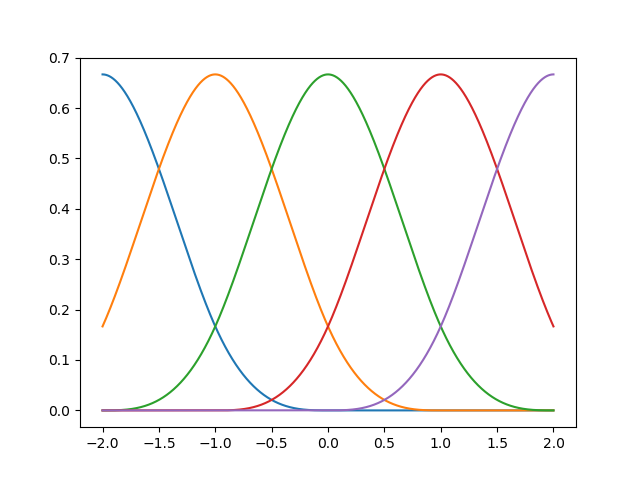

In [11]:
plt.plot(X, Y_minus2)
plt.plot(X, Y_minus1)
plt.plot(X, Y)
plt.plot(X, Y_1)
plt.plot(X, Y_2)

In [12]:
basis_data_df = pd.DataFrame(dict(x = X, y_minus_2 = Y_minus2, y_minus_1 = Y_minus1, y = Y, y_1 = Y_1, y_2 = Y_2))

In [13]:
useful_data = basis_data_df.query('0 <= x <= 1')
useful_data = useful_data.drop('y_minus_2', axis = 1)

<IPython.core.display.Javascript object>


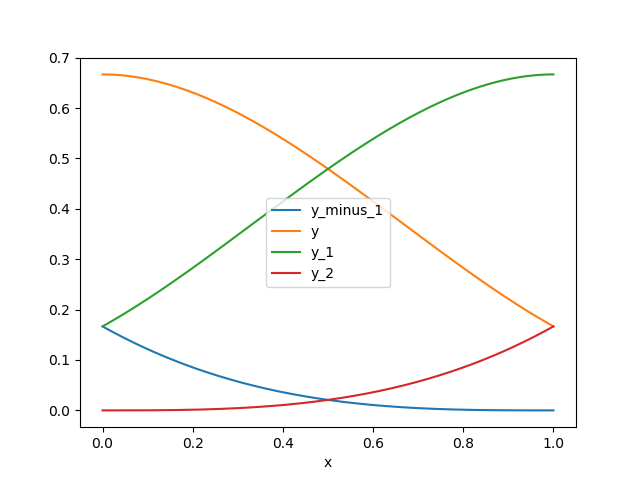

In [14]:
ax_ = None
ax_ = useful_data.plot(x = 'x', y = 'y_minus_1', ax = ax_)
ax_ = useful_data.plot(x = 'x', y = 'y', ax = ax_)
ax_ = useful_data.plot(x = 'x', y = 'y_1', ax = ax_)
ax_ = useful_data.plot(x = 'x', y = 'y_2', ax = ax_)

In [15]:
display(smf.ols('y_minus_1 ~ x + I(x**2) + I(x**3)', data = useful_data).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_minus_1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.894e+31
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:07:11   Log-Likelihood:             3.4236e+05
No. Observations:               10001   AIC:                        -6.847e+05
Df Residuals:                    9997   BIC:                        -6.847e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1667   1.31e-17   1.27e+16      0.000       0.167       0.167
x             -0.5000   1.14e-16  -4.39e+15      0.000      -0.500      -0.500
I(x ** 2)      0.5000   2.64e-16   1.89e+15      0.000       0.500       0.500
I(x ** 3)     -0.1667   1.74e-16  -9.59e+14      0.000      -0.167      -0.167
==============================================================================
Omnibus:                     1186.548   Durbin-Watson:                   0.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1658.131
Skew:                          -0.991   Prob(JB):                         0.00
Kurtosis:                       3.220   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
display(smf.ols('y ~  I(x**2) + I(x**3)', data = useful_data).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.558e+32
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:07:11   Log-Likelihood:             3.3469e+05
No. Observations:               10001   AIC:                        -6.694e+05
Df Residuals:                    9998   BIC:                        -6.693e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6667   1.42e-17   4.71e+16      0.000       0.667       0.667
I(x ** 2)     -1.0000   1.42e-16  -7.02e+15      0.000      -1.000      -1.000
I(x ** 3)      0.5000    1.5e-16   3.34e+15      0.000       0.500       0.500
==============================================================================
Omnibus:                     1180.080   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1072.464
Skew:                          -0.728   Prob(JB):                    1.31e-233
Kurtosis:                       2.327   Cond. No.                         31.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
display(smf.ols('y_1 ~ x + I(x**2) + I(x**3)', data = useful_data).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.359e+31
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:07:11   Log-Likelihood:             3.2890e+05
No. Observations:               10001   AIC:                        -6.578e+05
Df Residuals:                    9997   BIC:                        -6.578e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1667   5.05e-17    3.3e+15      0.000       0.167       0.167
x              0.5000   4.37e-16   1.14e+15      0.000       0.500       0.500
I(x ** 2)      0.5000   1.02e-15   4.92e+14      0.000       0.500       0.500
I(x ** 3)     -0.5000   6.68e-16  -7.48e+14      0.000      -0.500      -0.500
==============================================================================
Omnibus:                    41387.095   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.983
Skew:                           0.133   Prob(JB):                    3.40e-161
Kurtosis:                       1.695   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
display(smf.ols('y_2 ~ I(x**3) - 1', data = useful_data).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.323e+33
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:07:11   Log-Likelihood:             3.4876e+05
No. Observations:               10001   AIC:                        -6.975e+05
Df Residuals:                   10000   BIC:                        -6.975e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I(x ** 3)      0.1667   4.58e-18   3.64e+16      0.000       0.167       0.167
==============================================================================
Omnibus:                      129.144   Durbin-Watson:                   2.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.266
Skew:                          -0.066   Prob(JB):                     1.21e-49
Kurtosis:                       3.723   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
def interpolation(u, ys):
    y_m1, y0, y1, y2 = ys
    
    u = np.array([1, u, u**2, u**3])
    #du = np.array([0, 1, 2*u, 3*u**2])
    #d2u = np.array([0, 0, 2, 6*u])
    
    C = np.array([[ 1/6, 2/3,   1/6,   0],
                  [-1/2,   0,   1/2,   0],
                  [ 1/2,  -1,   1/2,   0],
                  [ -1/6, 1/2, -1/2, 1/6]])
    p = np.array(ys)
    
    y = np.dot(u, np.matmul(C, p))
    
    return y

In [20]:
X = []
Y = []

for x_idx in range(1000):
    x = x_idx/1000.0   
    X.append(x)
    Y.append(interpolation(x, [30, 10, 20, 40]))
    
for x_idx in range(1000):
    x = x_idx/1000.0   
    X.append(1 + x)
    Y.append(interpolation(x, [10, 20, 40, 20]))
    
for x_idx in range(1000):
    x = x_idx/1000.0   
    X.append(2 + x)
    Y.append(interpolation(x, [20, 40, 20, 20]))

<IPython.core.display.Javascript object>


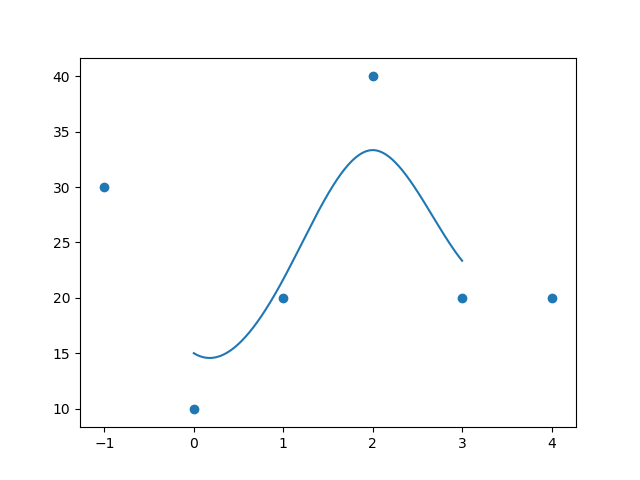

In [21]:
fig1 = plt.figure()
plt.plot(X, Y)
plt.scatter([-1, 0, 1, 2, 3, 4], [30, 10, 20, 40, 20, 20])